In [32]:
import pandas as pd

# Load the dataset
df = pd.read_csv("RFM_data.csv")





In [33]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [34]:
import pandas as pd
import datetime as dt


# Convert 'InvoiceDate' column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])



In [35]:
# Calculate Recency, Frequency, and Monetary value
today = max(df['InvoiceDate'])
df['Recency'] = (today - df['InvoiceDate']).dt.days
df['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')
df['Monetary'] = df['Quantity'] * df['UnitPrice']

# Define functions for scoring
def r_score(x):
    if x <= 30:
        return 5
    elif 31 <= x <= 60:
        return 4
    elif 61 <= x <= 90:
        return 3
    elif 91 <= x <= 180:
        return 2
    else:
        return 1

def fm_score(x):
    if x >= 4:
        return 5
    elif x == 3:
        return 4
    elif x == 2:
        return 3
    elif x == 1:
        return 2
    else:
        return 1




In [36]:
# Apply scoring functions
df['R_Score'] = df['Recency'].apply(r_score)
df['F_Score'] = df['Frequency'].apply(fm_score)
df['M_Score'] = df['Monetary'].apply(fm_score)





In [38]:
# Calculate RFM scores
df['RFM_Score'] = df['R_Score'].astype(str) + df['F_Score'].astype(str) + df['M_Score'].astype(str)

# Define score ranges for each segment
segments = {
    'Champions': {'R': (4, 5), 'F': (4, 5), 'M': (4, 5)},
    'Loyal customers': {'R': (3, 5), 'F': (3, 5), 'M': (3, 5)},
    'Potential loyalist': {'R': (4, 5), 'F': (2, 3), 'M': (2, 3)},
    'Recent customers': {'R': (4, 5), 'F': (1, 2), 'M': (1, 2)},
    'Promising': {'R': (4, 5), 'F': (1, 2), 'M': (1, 2)},
    'Needs attention': {'R': (3, 5), 'F': (3, 5), 'M': (3, 5)},
    'About to sleep': {'R': (1, 2), 'F': (1, 2), 'M': (1, 2)},
    'At risk': {'R': (2, 5), 'F': (1, 3), 'M': (1, 3)},
    'Can\'t lose them': {'R': (1, 3), 'F': (4, 5), 'M': (4, 5)},
    'Hibernating': {'R': (1, 2), 'F': (1, 2), 'M': (1, 2)},
}

# Map segments to RFM scores
def map_segment(r, f, m):
    for segment, ranges in segments.items():
        if ranges['R'][0] <= r <= ranges['R'][1] and ranges['F'][0] <= f <= ranges['F'][1] and ranges['M'][0] <= m <= ranges['M'][1]:
            return segment
    return 'Other'

df['Segment'] = df.apply(lambda row: map_segment(row['R_Score'], row['F_Score'], row['M_Score']), axis=1)# Calculate RFM scores
df['RFM_Score'] = df['R_Score'].astype(str) + df['F_Score'].astype(str) + df['M_Score'].astype(str)




C:\Users\Mukesh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


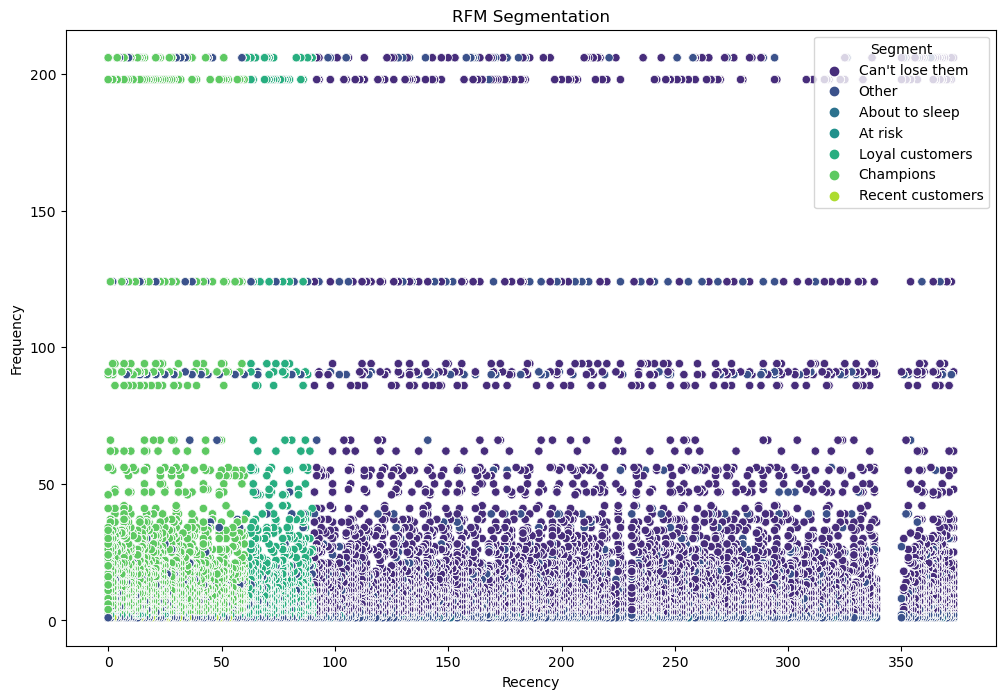

In [39]:
# Visualize the RFM segments
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Recency', y='Frequency', hue='Segment', data=df, palette='viridis')
plt.title('RFM Segmentation')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

In [40]:
# Conclude findings and suggest strategies
# You can analyze the distribution of customers in each segment and formulate strategies based on their characteristics.
# For example, for "Champions," you might want to focus on loyalty programs, while for "At risk," you may want to implement re-engagement campaigns.

# Print the count of customers in each segment
print(df['Segment'].value_counts())

Can't lose them     156777
Other               114622
Champions            67610
Loyal customers      39949
At risk               6126
Recent customers      4107
About to sleep        3544
Name: Segment, dtype: int64


## Results-

Can't lose them (156,777): High Recency, high Frequency, and high Monetary value. These are valuable customers that should be retained with special attention and personalized offers.

Champions (67,610): High scores across all RFM parameters. These are your most valuable and engaged customers. Consider loyalty programs or exclusive offers to maintain their loyalty.

Loyal customers (39,949): While not as high as Champions, these customers still have good scores in Recency, Frequency, and Monetary value. Continue engaging them to ensure their continued loyalty.

At risk (6,126): These customers have relatively low Frequency and Monetary value and are at risk of disengaging. Implement strategies to re-engage them, such as targeted promotions or surveys to understand their needs.

Recent customers (4,107): Customers with high Recency but low Frequency and Monetary value. They may be new to your business, and efforts should be made to convert them into more loyal customers.

About to sleep (3,544): Customers with low scores across all RFM parameters. These customers are at risk of becoming inactive. Consider targeted campaigns to rekindle their interest.

Other (114,622): Customers that did not fit into the predefined segments. Depending on your business goals, you may choose to further analyze or target specific subgroups within this category.



# Conclusion and stratergies 

### Can't Lose Them (156,777):

Conclusion: These are high-value customers with recent and frequent transactions. Losing them would have a significant impact on revenue.
Strategies:
Implement loyalty programs to reward their continued engagement.
Provide exclusive offers and personalized discounts to maintain their interest.
Collect feedback to understand their preferences and improve their experience.


Champions (67,610):

Conclusion: This segment represents the most valuable and engaged customers.
Strategies:
Offer VIP services, early access to products, or special events to reinforce their loyalty.
Encourage them to refer friends and family to expand your customer base.
Monitor their preferences and tailor marketing campaigns to their interests.
Loyal Customers (39,949):

Conclusion: While not at the level of Champions, these customers are still valuable and loyal.
Strategies:
Provide loyalty incentives to encourage repeat purchases.
Introduce cross-selling and upselling strategies to increase their average order value.
Communicate regularly with personalized newsletters and promotions.
At Risk (6,126):

Conclusion: These customers show signs of potential disengagement and need attention.
Strategies:
Launch re-engagement campaigns with targeted promotions.
Conduct surveys to identify reasons for reduced engagement.
Offer incentives or discounts to encourage them to return and make a purchase.
Recent Customers (4,107):

Conclusion: These customers are recent but not yet highly engaged.
Strategies:
Implement onboarding campaigns to introduce them to additional products or services.
Provide special discounts for their next purchase to encourage repeat business.
Request feedback to understand their initial experience and make improvements.
About to Sleep (3,544):

Conclusion: This segment consists of customers with declining engagement.
Strategies:
Launch targeted win-back campaigns with attractive offers.
Send reminders of the benefits of your products or services.
Consider personalized communication to reignite their interest.